In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = load_wine()
X = data.data
y = data.target

a) Koliko atributa imaju učitani podaci? Koliko instanci imaju učitani podaci? Koliko različitih klasa postoji?

In [3]:
print(f'Broj atributa: {X.shape[1]}\nBroj instanci: {X.shape[0]}')
print(f'Broj razlicitih klasa: {np.unique(y).shape[0]}')

Broj atributa: 13
Broj instanci: 178
Broj razlicitih klasa: 3


b) Podeliti podatke na skup za obučavanje i testiranje u razmeri 1:3. Za `random_state` parametar postaviti vrednost 7.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

c) Napraviti niz `Ks` koji sadrži prirodne brojeve iz intervala $[1, 50]$. Pronaći model K najbližih suseda koji za parametar $k$ (broj suseda)
iz ovog intervala ima najveću tačnost (accuracy) na podacima za testiranje nakon što se model obuči na podacima za obučavanje.
Ispisati za koje $k$ je tačnost maksimalna i koja je njena vrednost.

In [5]:
Ks = [k for k in range(1, 51)]

In [6]:
max_acc = -1
best_k = -1
accs = []

for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accs.append(acc)
    if acc > max_acc:
        max_acc = acc
        best_k = k

d) Nacrtati grafik koji prikazuje kako se menja tačnost klasifikatora na test podacima u zavisnosti od promene parametra $k$.
Na $x$ obeležiti `k`, a $y$ osu obeležiti sa `tacnost (accuracy)`.

Text(0, 0.5, 'Tacnost (accuracy)')

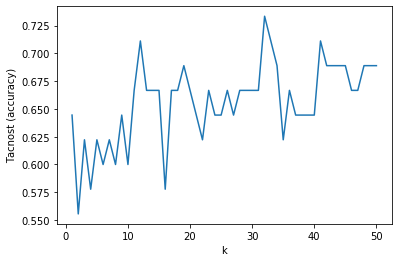

In [7]:
plt.plot(Ks, accs)
plt.xlabel('k')
plt.ylabel('Tacnost (accuracy)')

e) Prikazati klasifikacioni izveštaj (prikazati mere preciznost, odziv, tačnost, f1 mera)
i za skup za obučavanje, i za skup za testiranje za najbolji pronađeni model.

In [8]:
print(f'Najveca tacnost: {max_acc} za k={best_k}')

Najveca tacnost: 0.7333333333333333 za k=32


In [9]:
clf = KNeighborsClassifier(best_k).fit(X_train, y_train)

In [10]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [11]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.66      0.83      0.74        52
           2       0.28      0.16      0.20        31

    accuracy                           0.69       133
   macro avg       0.61      0.62      0.61       133
weighted avg       0.65      0.69      0.67       133



In [12]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.68      0.79      0.73        19
           2       0.82      0.53      0.64        17

    accuracy                           0.73        45
   macro avg       0.75      0.77      0.74        45
weighted avg       0.75      0.73      0.72        45



In [13]:
clf.score(X_train, y_train)

0.6917293233082706

In [14]:
clf.score(X_test, y_test)

0.7333333333333333